Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description: Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [4]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [5]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
data   

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


 Hierarchical Clustering


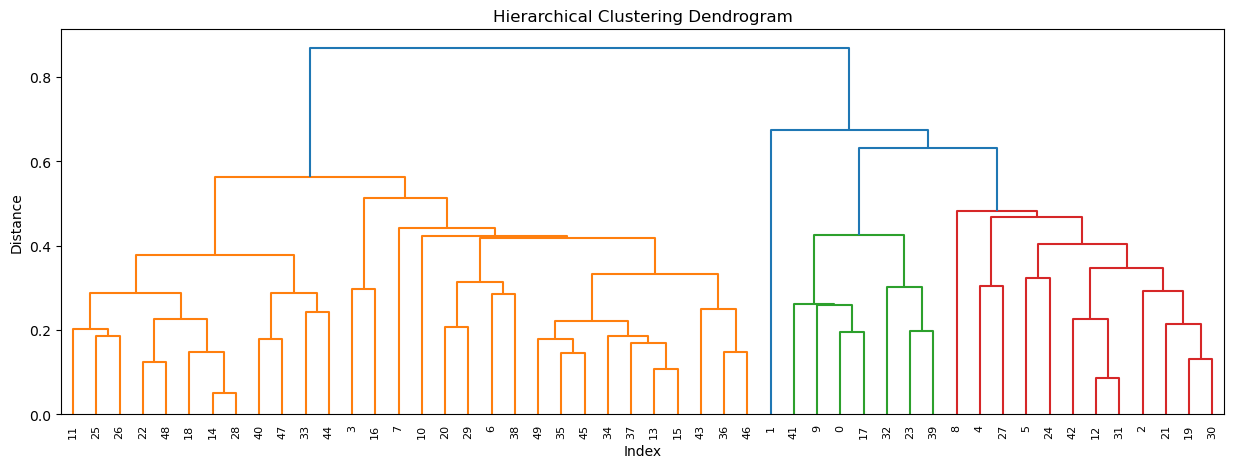

In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#fp = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [9]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [10]:
crime.iloc[:,1:].groupby(crime.clust).mean()    

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [11]:
data = crime[(crime.clust==0)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


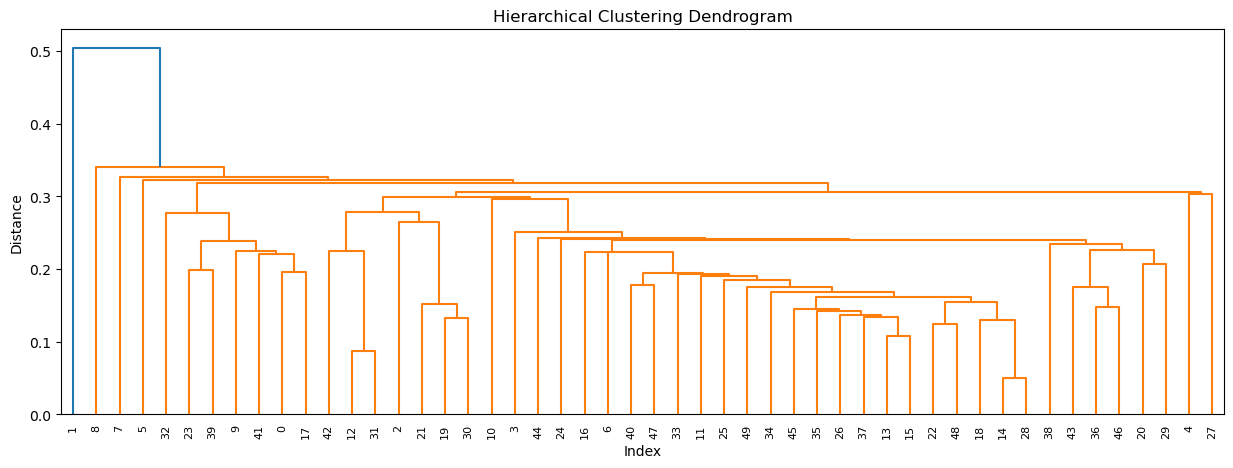

In [12]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()    

In [13]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


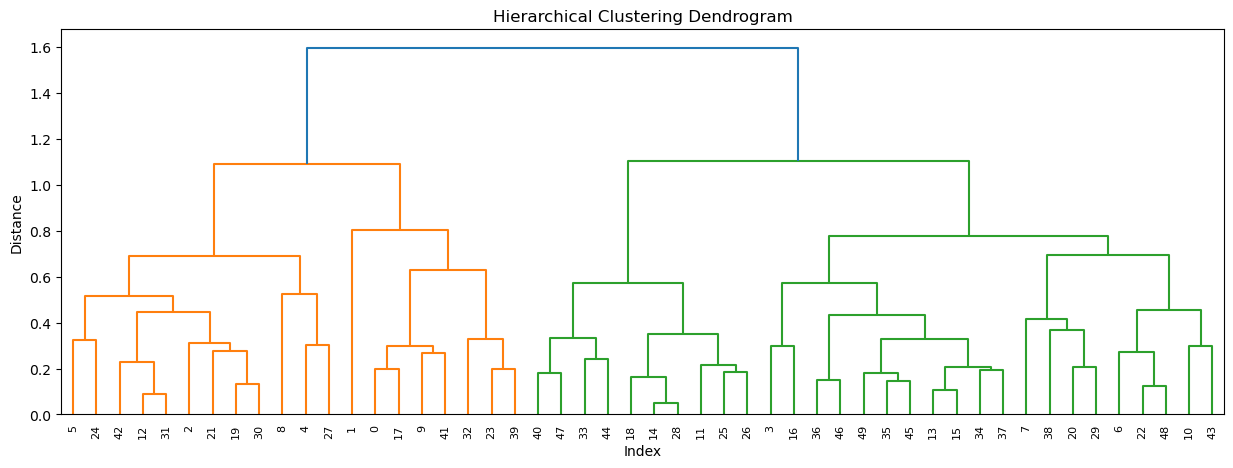

In [14]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# K-Means Clustering


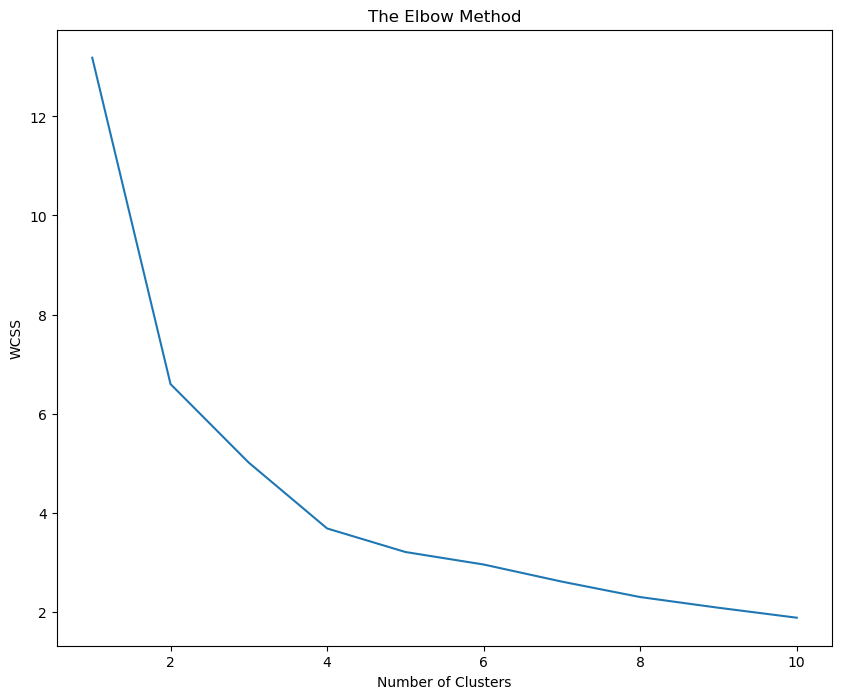

In [36]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [21]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [22]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([4, 1, 1, 3, 1, 1, 0, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 4, 2, 1, 0, 1,
       2, 4, 3, 2, 2, 1, 2, 0, 1, 1, 4, 2, 0, 3, 3, 0, 0, 4, 2, 4, 1, 0,
       2, 3, 0, 2, 2, 3])

In [23]:
y_kmeans

array([4, 1, 1, 3, 1, 1, 0, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 4, 2, 1, 0, 1,
       2, 4, 3, 2, 2, 1, 2, 0, 1, 1, 4, 2, 0, 3, 3, 0, 0, 4, 2, 4, 1, 0,
       2, 3, 0, 2, 2, 3])

In [24]:
clf.cluster_centers_ 

array([[0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.3939759 , 0.38356164, 0.53050847, 0.33953488],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388]])

In [25]:
clf.inertia_

3.1842618139677223

In [26]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,4


In [27]:
crime.iloc[:,1:7].groupby(crime.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.955556,125.444444,80.111111,17.788889,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,3.091667,76.000000,52.083333,11.833333,2.0
3,7.340000,157.000000,63.300000,20.440000,3.0
4,14.671429,251.285714,54.285714,21.685714,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

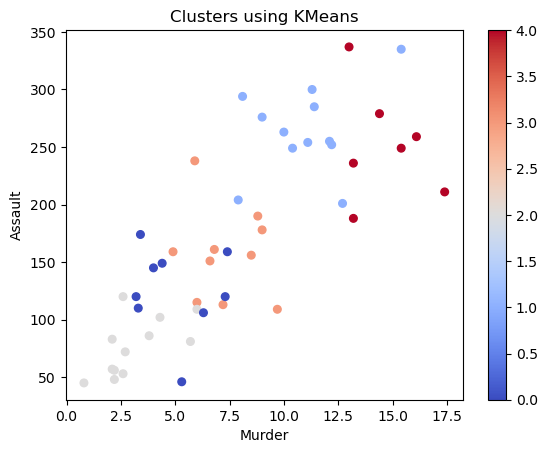

In [28]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [37]:
WCSS

[13.184122550256445,
 6.596893867946197,
 5.010878493006419,
 3.683456153585913,
 3.2081177596070813,
 2.9554556270474435,
 2.6098066116580325,
 2.298439287982222,
 2.0828083193253297,
 1.8816545816642805]

 DB Scan Clustering

In [31]:
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
 5   clust       50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [32]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,4


In [38]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   4. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   3. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   3. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   4. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   4. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.62329431],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.67382028],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.67382028],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.85758945],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.67382028],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.67382028],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.43952515],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.85758945],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.67382028],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.62329431],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.43952515],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.09188458],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.67382028],
       [-0.13637203, -0.70012057, -0.0

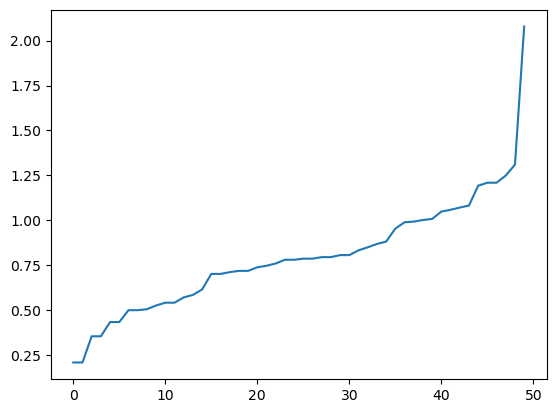

In [40]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [41]:
dbscan = DBSCAN(eps=0.475, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.475, min_samples=4)

In [42]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [43]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl
crime1= pd.concat([crime,cl],axis=1)
crime1

,Murder,Assault,UrbanPop,Rape,clust,cluster
0,13.2,236,58,21.2,4,-1
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,1,-1
3,8.8,190,50,19.5,3,-1
4,9.0,276,91,40.6,1,-1
5,7.9,204,78,38.7,1,-1
6,3.3,110,77,11.1,0,-1
7,5.9,238,72,15.8,3,-1
8,15.4,335,80,31.9,1,-1
9,17.4,211,60,25.8,4,-1


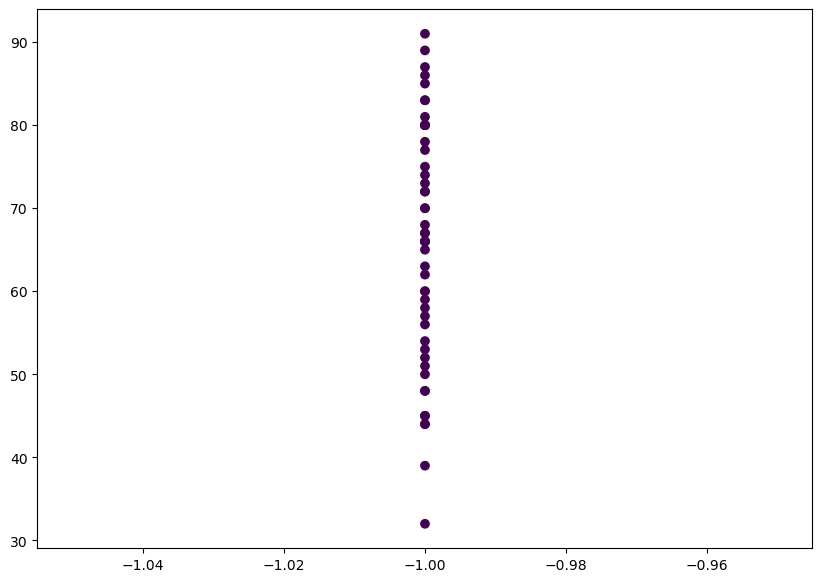

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime1['cluster'],crime['UrbanPop'], c=dbscan.labels_) 
